<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Computer%20Vision/Visual_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_xla

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#!python pytorch-xla-env-setup.py --version 1.7
#!pip install timm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6028  100  6028    0     0  23045      0 --:--:-- --:--:-- --:--:-- 23095


In [ ]:
#!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version 1.7
#!pip install timm

Updating... This may take around 2 minutes.
Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: torchvision 0.16.0+cu118
Uninstalling torchvision-0.16.0+cu118:
  Successfully uninstalled torchvision-0.16.0+cu118
CommandException: No URLs matched: gs://tpu-pytorch/wheels/torch-1.7-cp310-cp310-linux_x86_64.whl
CommandException: No URLs matched: gs://tpu-pytorch/wheels/torch_xla-1.7-cp310-cp310-linux_x86_64.whl
CommandException: No URLs matched: gs://tpu-pytorch/wheels/torchvision-1.7-cp310-cp310-linux_x86_64.whl
Processing ./torch-1.7-cp310-cp310-linux_x86_64.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/torch-1.7-cp310-cp310-linux_x86_64.whl'

Processing ./torch_xla-1.7-cp310-cp310-linux_x86_64.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/torch_xla-1.7-cp310-cp310-linux_x8

In [ ]:
#!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#!python pytorch-xla-env-setup.py --version 1.7
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uzazam","key":"7abb2778b77e603b3a87069f481fc6a6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d piyush1089/glass-hiring

100% 823M/826M [00:10<00:00, 105MB/s] 
100% 826M/826M [00:10<00:00, 85.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/biglycan-breast-cancer.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import transforms

import torch_xla
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.distributed.parallel_loader as pl

import timm

import gc
import os
import time
import random
from datetime import datetime

from PIL import Image
from tqdm.notebook import tqdm
from sklearn import model_selection, metrics

In [ ]:
# general global variables
DATA_PATH = "/content/dataset"
TRAIN_PATH = "/content/dataset/train"
TEST_PATH = "/content/dataset/test"
MODEL_PATH = (
    "/content/jx_vit_base_p16_224-80ecf9dd.pth"
)

# model specific global variables
IMG_SIZE = 224
BATCH_SIZE = 16
LR = 2e-05
GAMMA = 0.7
N_EPOCHS = 10

In [ ]:
df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
df.head()

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket


In [ ]:
# Make a numerical column for club memership for plotting by networkx
# 0 - Mr. Hi; 1 - Officer
df['label'] = df['label'].replace(['Badminton', 'Cricket', 'Wrestling',
                                   'Tennis', 'Karate', 'Soccer', 'Swimming'], [0, 1, 2, 3, 4, 5, 6])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8227 entries, 0 to 8226
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_ID  8227 non-null   object
 1   label     8227 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.7+ KB


<Axes: >

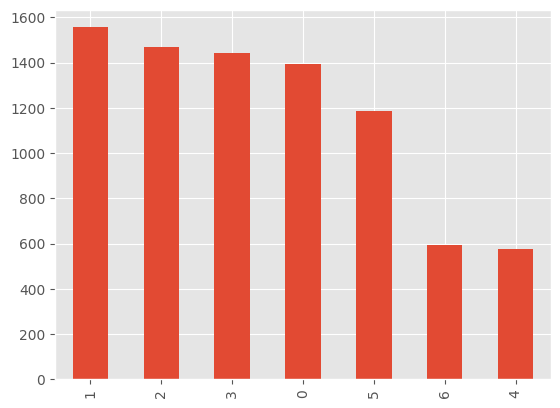

In [ ]:
df.label.value_counts().plot(kind="bar")

In [ ]:
train_df, valid_df = model_selection.train_test_split(
    df, test_size=0.1, random_state=42, stratify=df.label.values
)

In [ ]:
class CassavaDataset(torch.utils.data.Dataset):
  def __init__(self, df, data_path=DATA_PATH, mode="train", transforms=None):
    super().__init__()
    self.df_data = df.values
    self.data_path = data_path
    self.transforms = transforms
    self.mode = mode
    self.data_dir = "train" if mode == "train" else "test"

  def __len__(self):
    return len(self.df_data)


  def __getitem__(self, index):
    img_name, label = self.df_data[index]
    img_path = os.path.join(self.data_path, self.data_dir, img_name)
    img = Image.open(img_path).convert("RGB")

    if self.transforms is not None:
      image = self.transforms(img)

    return image, label


In [ ]:
# create image augmentations
transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

transforms_valid = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

In [ ]:
print("Available Vision Transformer Models: ")
timm.list_models("vit*")

Available Vision Transformer Models: 


['vit_base_patch8_224',
 'vit_base_patch14_dinov2',
 'vit_base_patch14_reg4_dinov2',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_384',
 'vit_base_patch16_clip_224',
 'vit_base_patch16_clip_384',
 'vit_base_patch16_clip_quickgelu_224',
 'vit_base_patch16_gap_224',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_reg8_gap_256',
 'vit_base_patch16_rpn_224',
 'vit_base_patch16_siglip_224',
 'vit_base_patch16_siglip_256',
 'vit_base_patch16_siglip_384',
 'vit_base_patch16_siglip_512',
 'vit_base_patch16_xp_224',
 'vit_base_patch32_224',
 'vit_base_patch32_384',
 'vit_base_patch32_clip_224',
 'vit_base_patch32_clip_256',
 'vit_base_patch32_clip_384',
 'vit_base_patch32_clip_448',
 'vit_base_patch32_clip_quickgelu_224',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_giant_patch14_clip_224',
 

In [ ]:
class ViTBase16(nn.Module):
  def __init__(self, n_classes, pretrained=False):
    super(ViTBase16, self).__init__()
    self.model = timm.create_model("vit_large_patch32_224", pretrained=False)
    if pretrained:
      self.model.load_state_dict(torch.load(MODEL_PATH))
    self.model.head = nn.Linear(self.model.head.in_features, n_classes)

  def forward(self, x):
    x = self.model(x)
    return x

  def train_one_epoch(self, train_loader, criterion, optimizer, device):
    # keep track of training loss
    epoch_loss = 0.0
    epoch_accuracy = 0.0

    # train the model #

    self.model.train()

    for i, (data, target) in enumerate(train_loader):
      # move tensors to GPU if CUDA is available
      if device.type == "cuda":
        data, target = data.cuda(), target.cuda()
      elif device.type == "xla":
        data = data.to(device, dtype=torch.float32)
        target = target.to(device, dtype=torch.int64)


      # clear the gradients of all optimized variables
      optimizer.zero_grad()
      # forward pass: compute predicted outputs by passing inputs to the model
      output = self.forward(data)
      # calculate the batch loss
      loss = criterion(output, target)
      # backward pass: compute gradient of the loss with respect to model parameters
      loss.backward()
      # Calculate Accuracy
      accuracy = (output.argmax(dim=1) == target).float().mean()
      # update training loss and accuracy
      epoch_loss += loss
      epoch_accuracy += accuracy
      # perform a single optimization step (parameter update)
      if device.type == "xla":
        xm.optimizer_step(optimizer)
        if i % 20 == 0:
          xm.master_print(f"\tBATCH {i+1}/{len(train_loader)} - LOSS: {loss}")

      else:
        optimizer.step()


    return epoch_loss / len(train_loader), epoch_accuracy / len(train_loader)


  def validate_one_epoch(self, valid_loader, criterion, device):
    # keep track of validation loss
    valid_loss = 0.0
    valid_accuracy = 0.0

    # validate the model #

    self.model.eval()
    for data, target in valid_loader:
      if device.type == "cuda":
        data, target = data.cuda(), target.cuda()
      elif device.type == "xla":
        data = data.to(device, dtype=torch.float32)
        target = target.to(device, dtype=torch.int64)

      with torch.no_grad():
        # forward pass: compute predicted outputs by passing inputs to the model
        output = self.model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # Calculate Accuracy
        accuracy = (output.argmax(dim=1) == target).float().mean()
         # update average validation loss and accuracy
        valid_loss += loss
        valid_accuracy += accuracy

    return valid_loss / len(valid_loader), valid_accuracy / len(valid_loader)


In [ ]:
def fit_tpu(
    model, epochs, device, criterion, optimizer, train_loader, valid_loader=None):
  valid_loss_min = np.Inf  # track change in validation loss
  # keeping track of losses as it happen
  train_losses = []
  valid_losses = []
  train_accs = []
  valid_accs = []

  for epoch in range(1, epochs + 1):
    gc.collect()
    para_train_loader = pl.ParallelLoader(train_loader, [device])

    xm.master_print(f"{'='*50}")
    xm.master_print(f"EPOCH {epoch} - TRAINING...")
    train_loss, train_acc = model.train_one_epoch(
            para_train_loader.per_device_loader(device), criterion, optimizer, device
        )
    xm.master_print(
            f"\n\t[TRAIN] EPOCH {epoch} - LOSS: {train_loss}, ACCURACY: {train_acc}\n"
        )
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    gc.collect()

    if valid_loader is not None:
       gc.collect()
       para_valid_loader = pl.ParallelLoader(valid_loader, [device])
       xm.master_print(f"EPOCH {epoch} - VALIDATING...")
       valid_loss, valid_acc = model.validate_one_epoch(
                para_valid_loader.per_device_loader(device), criterion, device
            )
       xm.master_print(f"\t[VALID] LOSS: {valid_loss}, ACCURACY: {valid_acc}\n")
       valid_losses.append(valid_loss)
       valid_accs.append(valid_acc)
       gc.collect()

       # save model if validation loss has decreased
       if valid_loss <= valid_loss_min and epoch != 1:

        xm.master_print(
                    "Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...".format(
                        valid_loss_min, valid_loss
                    )
                )

    valid_loss_min = valid_loss
  return {
        "train_loss": train_losses,
        "valid_losses": valid_losses,
        "train_acc": train_accs,
        "valid_acc": valid_accs,
    }

In [ ]:
model = ViTBase16(n_classes=6, pretrained=True)

RuntimeError: ignored

In [ ]:
def _run():
  train_dataset = CassavaDataset(train_df, transforms=transforms_train)
  valid_dataset = CassavaDataset(valid_df, transforms=transforms_valid)
  train_sampler = torch.utils.data.distributed.DistributedSampler(
        train_dataset,
        num_replicas=xm.xrt_world_size(),
        rank=xm.get_ordinal(),
        shuffle=True,
    )

  valid_sampler = torch.utils.data.distributed.DistributedSampler(
        valid_dataset,
        num_replicas=xm.xrt_world_size(),
        rank=xm.get_ordinal(),
        shuffle=False,
    )

  train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=BATCH_SIZE,
        sampler=train_sampler,
        drop_last=True,
        num_workers=8,
    )

  valid_loader = torch.utils.data.DataLoader(
        dataset=valid_dataset,
        batch_size=BATCH_SIZE,
        sampler=valid_sampler,
        drop_last=True,
        num_workers=8,
    )

  criterion = nn.CrossEntropyLoss()
    #     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  device = xm.xla_device()
  model.to(device)
  lr = LR * xm.xrt_world_size()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  xm.master_print(f"INITIALIZING TRAINING ON {xm.xrt_world_size()} TPU CORES")

  start_time = datetime.now()
  xm.master_print(f"Start Time: {start_time}")

  logs = fit_tpu(
        model=model,
        epochs=N_EPOCHS,
        device=device,
        criterion=criterion,
        optimizer=optimizer,
        train_loader=train_loader,
        valid_loader=valid_loader,
    )
  xm.master_print(f"Execution time: {datetime.now() - start_time}")
  xm.master_print("Saving Model")
  xm.save(
        model.state_dict(), f'model_5e_{datetime.now().strftime("%Y%m%d-%H%M")}.pth'
    )


In [ ]:
# Start training processes
def _mp_fn(rank, flags):
  torch.set_default_tensor_type("torch.FloatTensor")
  a = _run()


# _run()
FLAGS = {}
xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=8, start_method="fork")


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


NameError: ignored